In [1]:
from vae_conditional import train_cvae

network_architecture = {
    "n_width": 32,
    "n_z": 2,  # dimensionality of latent space
    "n_hidden_units": 500,
    "n_layers": 3,
}

cvae_2d = train_cvae(network_architecture, saving_step=5, training_epochs=30)

Epoch: 0001 Cost: 233.059499410 Time: 10.294
Accuracy: 0.6363
Model has been saved to: tmp/CVAE.20180613075459306956.step0
Epoch: 0002 Cost: 206.177631734 Time: 23.207
Epoch: 0003 Cost: 196.337129161 Time: 33.265
Epoch: 0004 Cost: 192.703177846 Time: 43.370
Epoch: 0005 Cost: 190.802948812 Time: 53.494
Epoch: 0006 Cost: 189.409270528 Time: 63.490
Accuracy: 0.8331
Model has been saved to: tmp/CVAE.20180613075459306956.step5
Epoch: 0007 Cost: 188.450607961 Time: 76.237
Epoch: 0008 Cost: 187.253500570 Time: 86.225
Epoch: 0009 Cost: 186.581956558 Time: 96.263
Epoch: 0010 Cost: 185.850719147 Time: 106.212
Epoch: 0011 Cost: 185.281096344 Time: 116.234
Accuracy: 0.863
Model has been saved to: tmp/CVAE.20180613075459306956.step10
Epoch: 0012 Cost: 185.085787023 Time: 128.950
Epoch: 0013 Cost: 184.332035599 Time: 138.923
Epoch: 0014 Cost: 184.347258860 Time: 148.975
Epoch: 0015 Cost: 183.548639323 Time: 158.915
Epoch: 0016 Cost: 183.174947484 Time: 168.962
Accuracy: 0.8693
Model has been saved t

<Figure size 432x288 with 0 Axes>

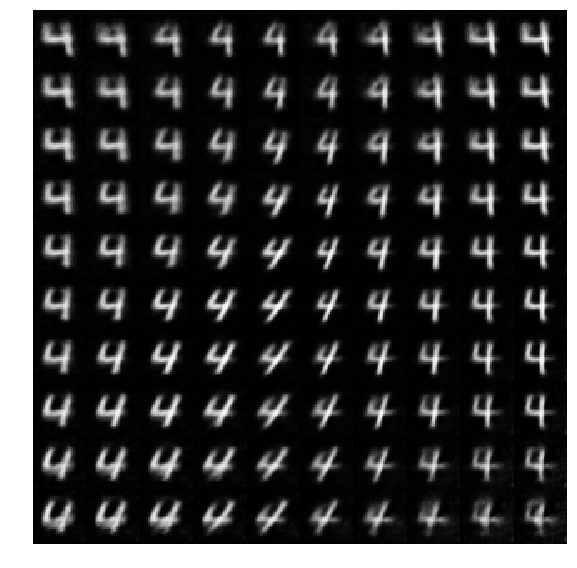

In [26]:
import numpy as np
import matplotlib.pyplot as plt

n_width = 32

nx = ny = 10
x_values = np.linspace(-2.5, 2.5, nx)
y_values = np.linspace(-2.5, 2.5, ny)
canvas = np.empty((n_width * ny, n_width * nx))
z_mu, y_as = [], []
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        z_mu.append([xi, yi])
        y_as.append(4)

z_mu = np.asarray(z_mu)
y_as = np.asarray(y_as)
# print(z_mu, y_as)
x_mean = cvae_2d.generate_with_y(y_as, z_mu)

idx = 0
for i, yi in enumerate(x_values):
    for j, xi in enumerate(y_values):
        canvas[(nx-i-1)*n_width:(nx-i)*n_width, j*n_width:(j+1)*n_width] = x_mean[idx].reshape(n_width, n_width)
        idx += 1

        
        
plt.clf()
plt.figure(figsize=(8, 8))        
Xi, Yi = np.meshgrid(x_values, y_values)
plt.imshow(canvas, origin="upper", cmap="gray")
plt.axis("off")
plt.tight_layout()
plt.show()

[[-0.6182792  -0.85978335]
 [-0.58225805  3.4496207 ]
 [-0.23729666 -0.02661402]
 ...
 [ 0.55392176 -0.6983685 ]
 [ 1.8104227  -0.39118582]
 [-1.8309147  -0.87160796]]


<Figure size 432x288 with 0 Axes>

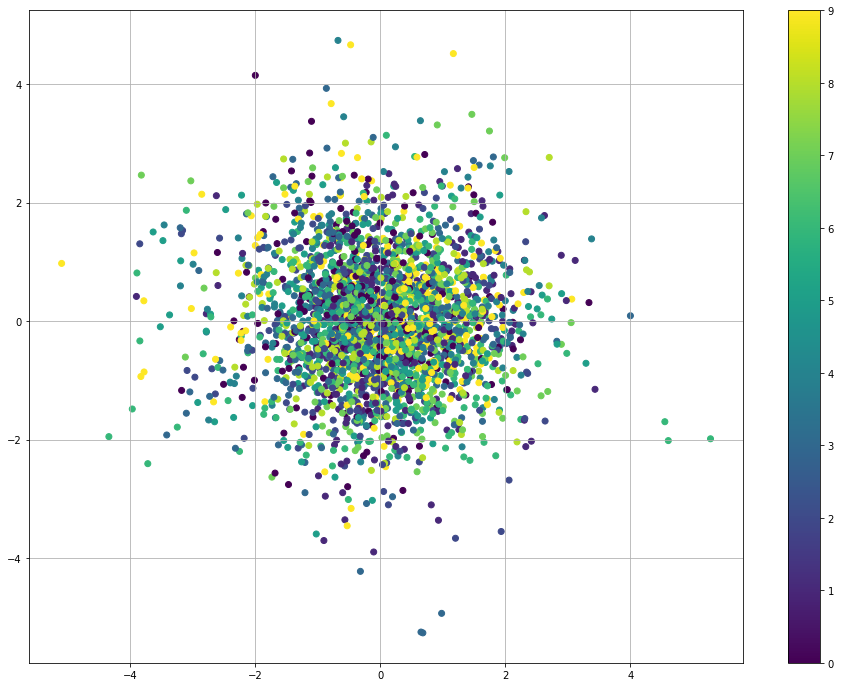

In [18]:
import mnist
import matplotlib.pyplot as plt

x_sample, y_sample = mnist.test_32_flat_labeled(3000)
z_mu = cvae_2d.transform_with_y(x_sample, y_sample)
print(z_mu)

plt.clf()
plt.figure(figsize=(16, 12))
# print(z_mu[:,0], z_mu[:,1])
plt.scatter(z_mu[:, 0], z_mu[:, 1], c=y_sample)
plt.colorbar()
plt.grid()
plt.show()

In [16]:
from vae_conditional import CVAE
cvae_2d = CVAE(network_architecture)
network_architecture = {
    "n_width": 32,
    "n_z": 2,  # dimensionality of latent space
    "n_hidden_units": 500,
    "n_layers": 3,
}
cvae_2d.load("tmp/CVAE.20180613075459306956.step10")

/home/ubuntu/tensor/lib/python3.5/site-packages/tensorflow/python/client/session.py:1711: UserWarning: An interactive session is already active. This can cause out-of-memory errors in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s).
  warnings.warn('An interactive session is already active. This can '


INFO:tensorflow:Restoring parameters from tmp/CVAE.20180613075459306956.step10
